In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
df = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
cat_columns = ["Work_accident", "promotion_last_5years", "Department", "salary", "left"]
for cat_column in cat_columns:
    print(df[cat_column].value_counts(), "\n")

0    12830
1     2169
Name: Work_accident, dtype: int64 

0    14680
1      319
Name: promotion_last_5years, dtype: int64 

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64 

low       7316
medium    6446
high      1237
Name: salary, dtype: int64 

0    11428
1     3571
Name: left, dtype: int64 



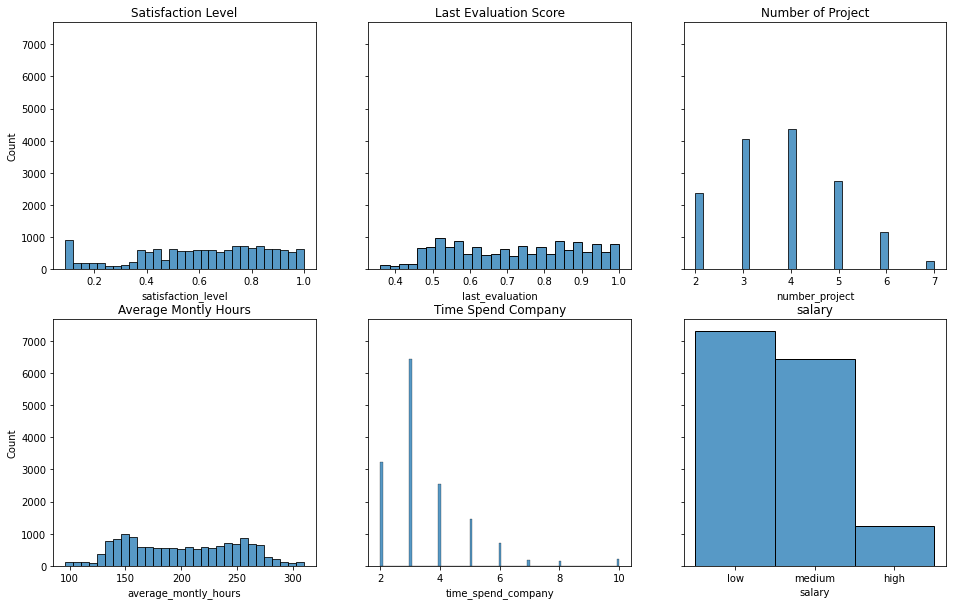

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharey=True)

# 
sns.histplot(ax=axes[0][0], x=df["satisfaction_level"])
axes[0][0].set_title("Satisfaction Level")

# 
sns.histplot(ax=axes[0][1], x=df["last_evaluation"])
axes[0][1].set_title("Last Evaluation Score")

# 
sns.histplot(ax=axes[0][2], x=df["number_project"])
axes[0][2].set_title("Number of Project")


sns.histplot(ax=axes[1][0], x=df["average_montly_hours"])
axes[1][0].set_title("Average Montly Hours")

sns.histplot(ax=axes[1][1], x=df["time_spend_company"])
axes[1][1].set_title("Time Spend Company")


sns.histplot(ax=axes[1][2], x=df["salary"])
axes[1][2].set_title("salary")

plt.show()

<AxesSubplot:xlabel='left', ylabel='count'>

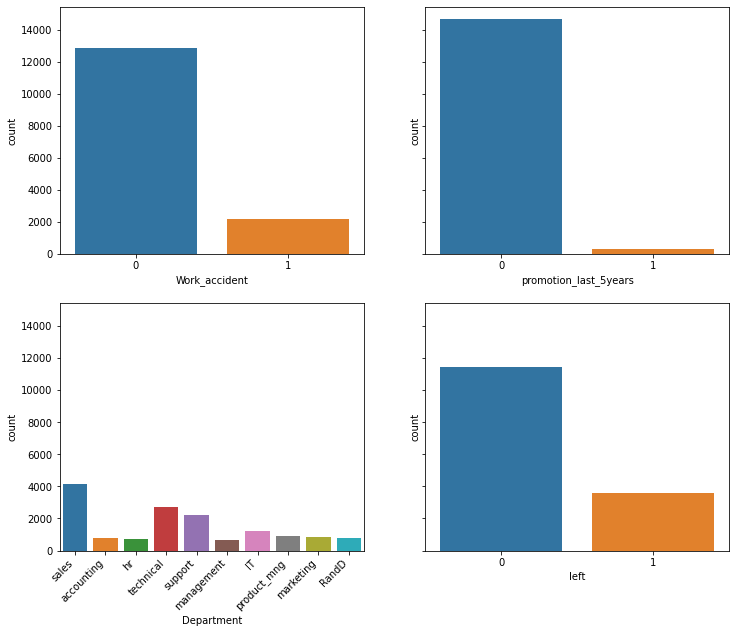

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

sns.countplot(ax=axes[0][0], x=df["Work_accident"])
sns.countplot(ax=axes[0][1], x=df["promotion_last_5years"])
sns.countplot(ax=axes[1][0], x=df["Department"])
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax=axes[1][1], x=df["left"])

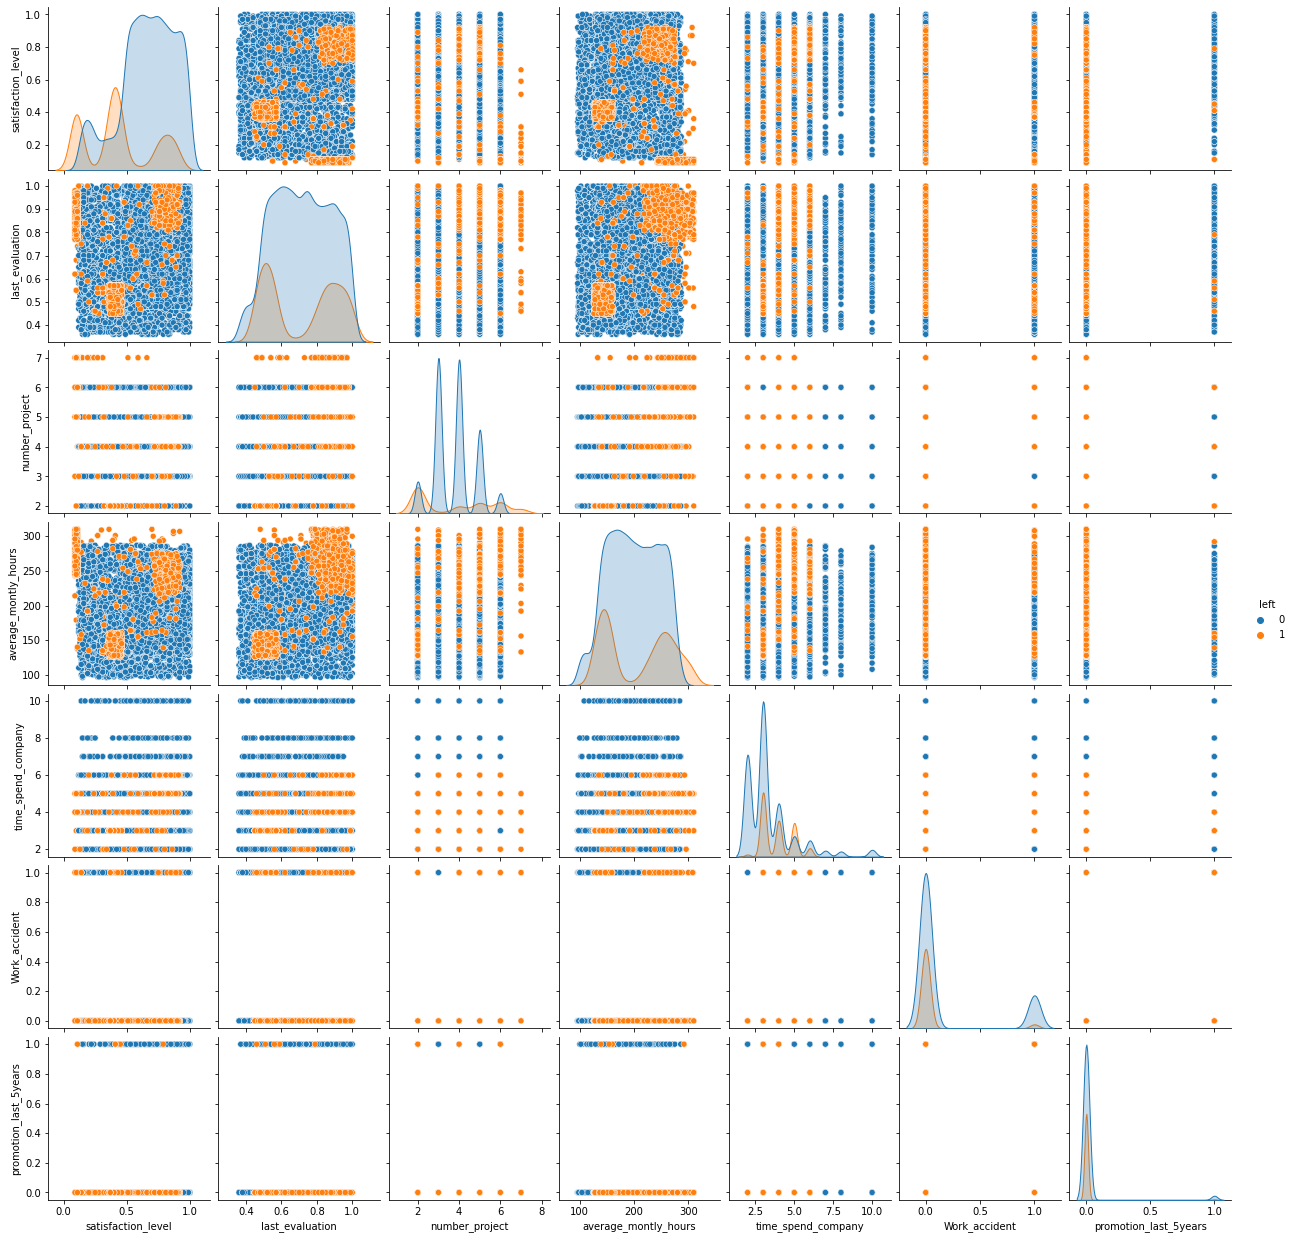

In [11]:
sns.pairplot(df,hue='left')

<AxesSubplot:>

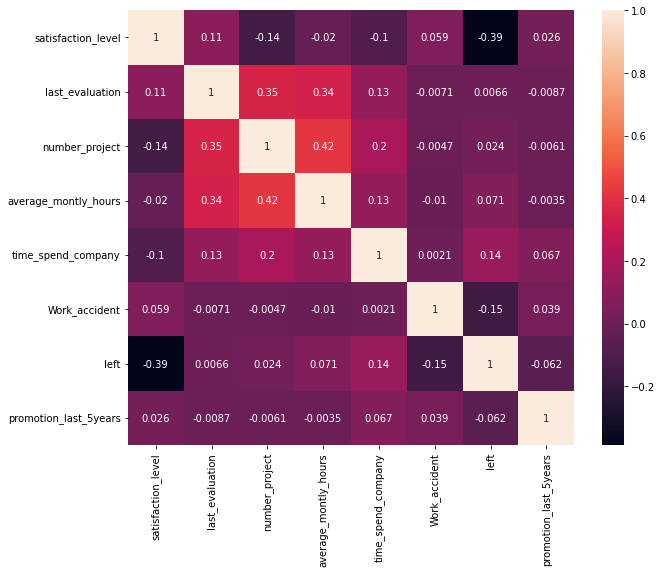

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.groupby("Department")["left"].mean().sort_values(ascending=False)

Department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64

One Hote Encoding

In [14]:
department_dummies = pd.get_dummies(df.Department)
df = pd.concat([df,department_dummies], axis='columns')

salary_dummies = pd.get_dummies(df.salary)
salary_dummies.drop('low', axis=1, inplace=True)
df = pd.concat([df,salary_dummies], axis='columns')

df.drop(['Department', 'salary'],axis=1,inplace=True)

In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
X = df.drop('left', axis=1)
y = df['left']

Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.4706553 ,
        -0.29980859, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.4706553 ,
        -0.29980859,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.4706553 ,
        -0.29980859,  1.15189816],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.4706553 ,
        -0.29980859, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.4706553 ,
        -0.29980859, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.4706553 ,
        -0.29980859, -0.8681323 ]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [21]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train,y_train) 

In [22]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, LR_model.predict(X_test)))
print("\nLogistic Regression Classification Report: \n", classification_report(y_test,  LR_model.predict(X_test)))

print("----------------------------------------------------------")

print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test, DT_model.predict(X_test)))
print("\nDecision Tree Classification Report: \n", classification_report(y_test,  DT_model.predict(X_test)))

Logistic Regression Accuracy:  0.774

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      2294
           1       0.54      0.28      0.37       706

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.75      3000

----------------------------------------------------------
Decision Tree Accuracy:  0.9636666666666667

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.94      0.91      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



Random Forest using GridSearchCV

In [23]:
param = [
    {'n_estimators': [200, 300, 400], 
     'max_depth': [5, 6, 7, 8, 9], 
     'max_leaf_nodes': [15, 20, 25]}, 
]
RF_model = RandomForestClassifier()
RF_gscv = GridSearchCV(RF_model, param, cv = 5, n_jobs = -1, verbose = 1)
RF_gscv.fit(X_train, y_train)
RF_best = RF_gscv.best_estimator_
pred = RF_gscv.predict(X_test)
RF_gscv.best_estimator_, RF_gscv.score(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  2.1min finished


(RandomForestClassifier(max_depth=9, max_leaf_nodes=25, n_estimators=400),
 0.9753312776064672)

In [24]:
print("Random Forest Tree Accuracy: ", metrics.accuracy_score(y_test, RF_gscv.predict(X_test)))
print("\nRandom Forest Classification Report: \n", classification_report(y_test,  RF_gscv.predict(X_test)))

Random Forest Tree Accuracy:  0.9696666666666667

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2294
           1       0.98      0.89      0.93       706

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000

